In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from approximate_nerve_theorem import (
    BallCover, GrowingNeuralGas, VietorisRipsComplex, 
    plot_two_diagrams, filter_diagrams, full_bottleneck
)
from ripser import ripser
from persim.bottleneck import bottleneck
from persim.visuals import plot_diagrams

In [2]:
import warnings
warnings.filterwarnings('ignore')

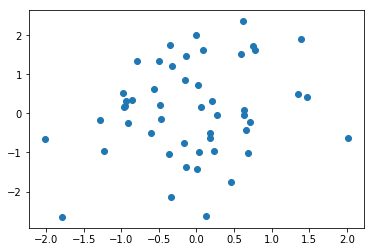

In [3]:
samples = np.random.normal(size=(50, 2))
_ = plt.scatter(samples[:, 0], samples[:, 1])

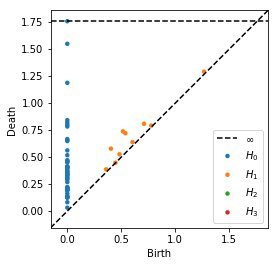

In [4]:
plot_diagrams(ripser(samples, maxdim=3)['dgms'])

# Circles

In [5]:
from sklearn.datasets import make_circles

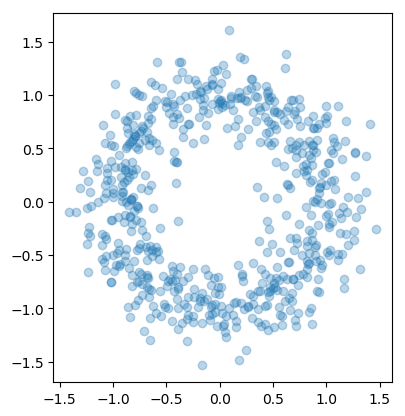

In [6]:
N = 600
NOISE = 0.2
SEED = 100
FACTOR = 0.95

samples = make_circles(N, shuffle=True, noise=NOISE, random_state=SEED, factor=FACTOR)[0]
fig, ax = plt.subplots()
ax.set_aspect(1)
_ = ax.scatter(samples[:, 0], samples[:, 1], marker='o', alpha=0.3)

In [7]:
def suggested_pipeline(samples: np.array):
    gas = GrowingNeuralGas(birth_period=5, max_age=5)
    gas.fit(samples, epochs=30)
    ball_cover = BallCover(samples, gas.neurons)
    ball_cover.fit()
    dgm_nerve = ball_cover.persistence_diagram(maxdim=2)
    dgm_nerve_filtered = filter_diagrams(dgm_nerve, ball_cover.epsilon)
    return ball_cover, dgm_nerve_filtered

In [8]:
def default_pipeline(samples: np.array, epsilon: float):
    dgm_full = ripser(samples, maxdim=2)['dgms']
    dgm_full_filtered = filter_diagrams(dgm_full, epsilon)
    return dgm_full, dgm_full_filtered

In [9]:
%load_ext memory_profiler

In [10]:
%%time
ball_cover, dgm_nerve_filtered = suggested_pipeline(samples)

Wall time: 6.98 s


In [11]:
%memit suggested_pipeline(samples)

peak memory: 121.31 MiB, increment: 2.95 MiB


In [12]:
%%time
dgm_full, dgm_full_filtered = default_pipeline(samples, ball_cover.epsilon)

Wall time: 48.4 s


In [13]:
%memit default_pipeline(samples, ball_cover.epsilon)

peak memory: 4161.95 MiB, increment: 4077.92 MiB


In [14]:
print(ball_cover.error_bound > full_bottleneck(dgm_full_filtered, dgm_nerve_filtered))
print(ball_cover.error_bound - full_bottleneck(dgm_full_filtered, dgm_nerve_filtered))

True
0.40557345747947693


In [15]:
ball_cover.error_bound

0.8261952996253967

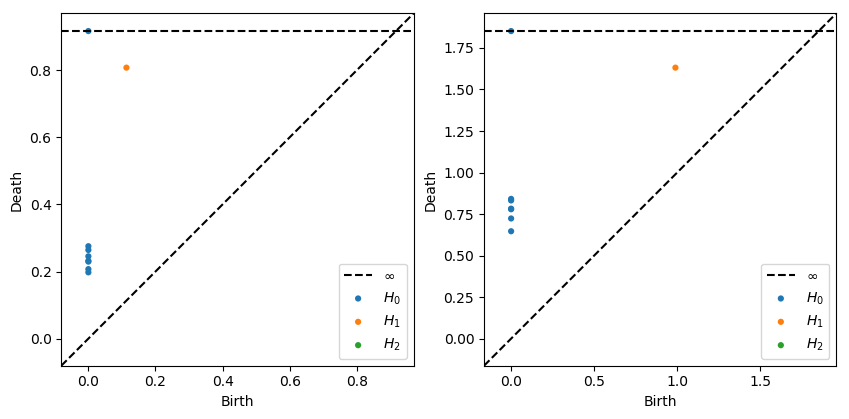

In [16]:
plot_two_diagrams(dgm_full_filtered, dgm_nerve_filtered)

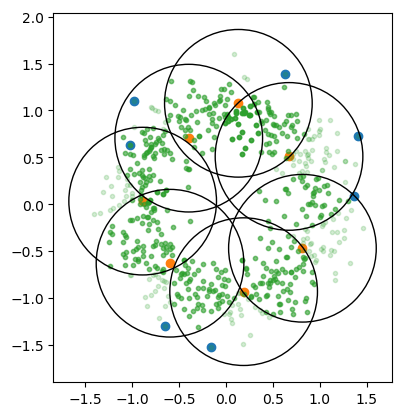

In [17]:
ball_cover.plot_cover()